# 04 - Liner Regression and Minimizing Cost

<img width="200" src="https://i.imgur.com/hbPVe1T.png">

In [1]:
import tensorflow as tf
import numpy as np

## Hypothesis 

$$ H(x) = Wx + b $$

## cost function

$$ cost(W)=\frac { 1 }{ m } \sum _{ i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

In [2]:
# cost 계산

W = 0
print (((W*1 - 1)**2 + (W*2 - 2)**2 + (W*3 - 3)** 2) / 3)

W = 1
print (((W*1 - 1)**2 + (W*2 - 2)**2 + (W*3 - 3)** 2) / 3)

W = 2
print (((W*1 - 1)**2 + (W*2 - 2)**2 + (W*3 - 3)** 2) / 3)

W = 3
print (((W*1 - 1)**2 + (W*2 - 2)**2 + (W*3 - 3)** 2) / 3)

4.666666666666667
0.0
4.666666666666667
18.666666666666668


In [3]:
data = [
    (1, 1),
    (2, 2),
    (3, 3),
]

def cost_func(w, data):
    s = 0
    m = len(data)
    for v in data:
        s += (w*v[0] - v[1]) ** 2
    return s/m

In [4]:
print( cost_func(0, data) )
print( cost_func(1, data) )
print( cost_func(2, data) )
print( cost_func(3, data) )

4.666666666666667
0.0
4.666666666666667
18.666666666666668


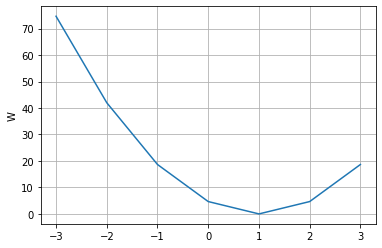

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

w_vals = range(-3, 4)
cost_vals = [cost_func(w, data) for w in w_vals]

plt.plot(w_vals, cost_vals)
plt.ylabel('cost')
plt.ylabel('W')
plt.grid()

# Gradient descent algorithm
* cost를 최소화 하는 대표적인 알고리즘
* 다수의 변수에도 적용이 가능

$$ W\leftarrow W-\alpha \frac { 1 }{ m } \sum _{ i=1 }^{ m }{ (Wx^{ i }-y^{ i })x^{ i } }  $$

* liner regression 의 핵심 알고리즘
* cost function을 설계할때 반드시 convex function 이어야 한다

In [55]:
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random.uniform([1], -1.0, 1.0), name='W')
b = tf.Variable(tf.random.uniform([1], -1.0, 1.0), name='b')

# X = tf.placeholder(tf.float32)
X = tf.Variable(tf.zeros(shape=(1)), name="X")
# Y = tf.placeholder(tf.float32)
Y = tf.Variable(tf.zeros(shape=(1)), name="Y")
@tf.function
def model(x):
    return W * x + b
cost = lambda: tf.reduce_mean(tf.square(model(x_data) - y_data))

a = tf.Variable(0.1) 
optimizer = tf.keras.optimizers.SGD(a)
optimizer.minimize(cost, var_list = [W, b]) 
# cost needs to be function, and be aware of using variable not tensor
# while using optimizer
# this updates w, b depending on the cost
print(f'W - {W.numpy()}\nb - {b.numpy()}')

W - [0.8078761]
b - [0.45369196]


In [56]:
# tf v1 은 initialize등을 수행했어야 함. 
# sess = tf.Session()
# sess.run(tf.initializers.global_variables()) 
for step in range(1000):
    optimizer.minimize(cost, [W, b])
    if step % 100 == 0:
        print(f'{step}\tW-{W.numpy()}\tb-{b.numpy()}')

0	W-[0.80571496]	b-[0.43980312]
100	W-[0.983012]	b-[0.03861773]
200	W-[0.99850935]	b-[0.00338865]
300	W-[0.99986917]	b-[0.0002973]
400	W-[0.99998856]	b-[2.6073356e-05]
500	W-[0.999999]	b-[2.3268658e-06]
600	W-[0.9999999]	b-[2.7646695e-07]
700	W-[1.]	b-[5.394285e-08]
800	W-[1.]	b-[5.394285e-08]
900	W-[1.]	b-[5.394285e-08]


In [57]:
print(model(5))
print(model(2.5))

tf.Tensor([5.], shape=(1,), dtype=float32)
tf.Tensor([2.5], shape=(1,), dtype=float32)
